In [68]:
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
import sklearn.tree as tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.ensemble import GradientBoostingClassifier
import time

In [69]:
from sklearn.model_selection import ShuffleSplit

In [70]:
# learning curve
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# first data set: digits

In [71]:
data = load_digits()

In [72]:
X, y = data.data, data.target

In [73]:
clf = tree.DecisionTreeClassifier()

In [74]:
clf = clf.fit(data.data, data.target)

[Text(81.30125662406483, 210.645, 'X[36] <= 0.5\nentropy = 0.9\nsamples = 1797\nvalue = [178, 182, 177, 183, 181, 182, 181, 179, 174, 180]'),
 Text(20.03790523690773, 197.055, 'X[28] <= 2.5\nentropy = 0.547\nsamples = 275\nvalue = [174, 0, 4, 1, 6, 25, 5, 0, 3, 57]'),
 Text(10.018952618453865, 183.465, 'X[21] <= 0.5\nentropy = 0.17\nsamples = 188\nvalue = [171, 0, 2, 0, 6, 6, 3, 0, 0, 0]'),
 Text(5.009476309226932, 169.875, 'X[53] <= 3.5\nentropy = 0.719\nsamples = 16\nvalue = [1, 0, 1, 0, 5, 6, 3, 0, 0, 0]'),
 Text(3.339650872817955, 156.285, 'entropy = 0.0\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 6, 0, 0, 0, 0]'),
 Text(6.67930174563591, 156.285, 'X[37] <= 5.5\nentropy = 0.64\nsamples = 10\nvalue = [1, 0, 1, 0, 5, 0, 3, 0, 0, 0]'),
 Text(5.009476309226932, 142.695, 'X[44] <= 8.0\nentropy = 0.56\nsamples = 5\nvalue = [1, 0, 1, 0, 0, 0, 3, 0, 0, 0]'),
 Text(3.339650872817955, 129.10500000000002, 'X[22] <= 4.5\nentropy = 0.5\nsamples = 2\nvalue = [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(1.6

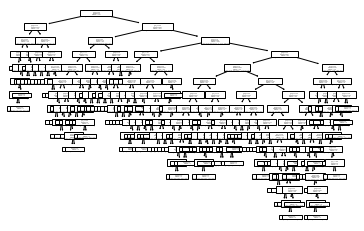

In [75]:
tree.plot_tree(clf)

In [76]:
import graphviz 

In [77]:
clf = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=3)
clf = clf.fit(X, y)
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("digits") 

'digits.pdf'

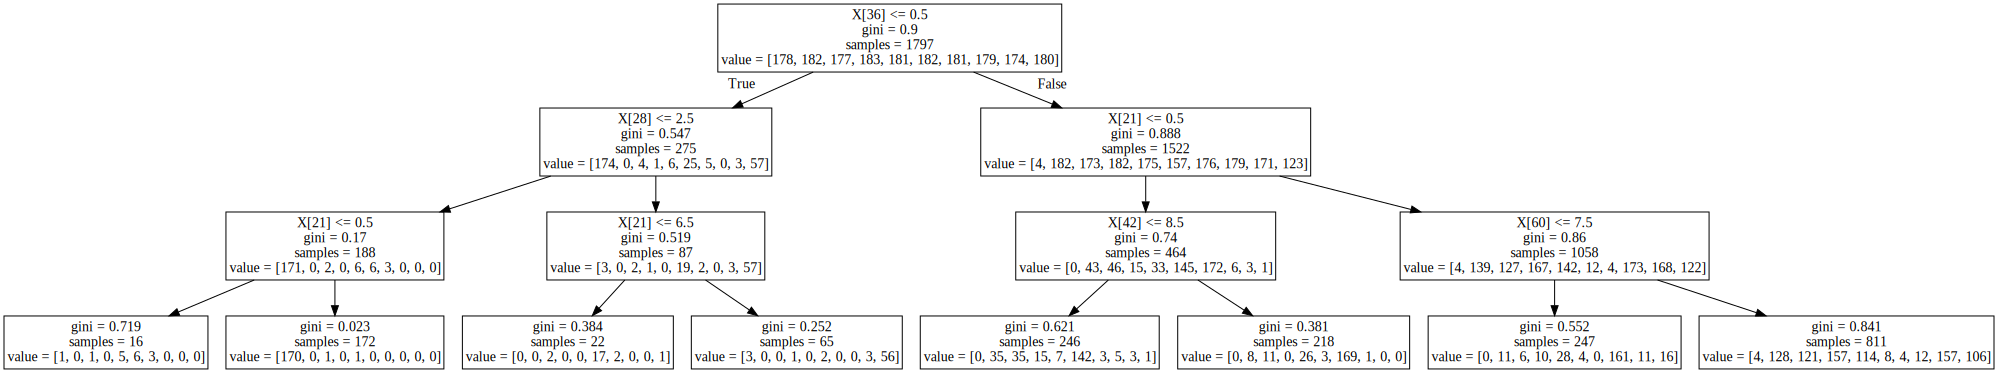

In [78]:
graph

In [79]:
from sklearn import preprocessing
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=18)
num_classifiers = 5

In [80]:
dt = tree.DecisionTreeClassifier(random_state=7)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print('decision tree without hyperparameter tuning is %.2f%%' % (dt_accuracy*100))

decision tree without hyperparameter tuning is 84.63%


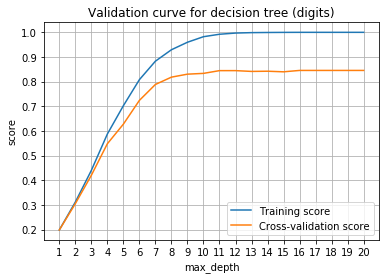

In [81]:
from sklearn.model_selection import validation_curve
depth_range = np.arange(20) + 1
train_scores, test_scores = validation_curve(dt, X_train, y_train, param_name="max_depth", param_range=depth_range, cv=5)

plt.figure()
plt.xticks(depth_range)
plt.plot(depth_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(depth_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for decision tree (digits)')
plt.xlabel('max_depth')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [82]:
clf_nn = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=7, max_iter=1000)
clf_nn.fit(X_train, y_train)
y_pred = clf_nn.predict(X_test)
nn_accuracy = accuracy_score(y_test, y_pred)
print('neural network without hyperparameter tuning is %.2f%%' % (nn_accuracy * 100))

neural network without hyperparameter tuning is 76.85%


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarni

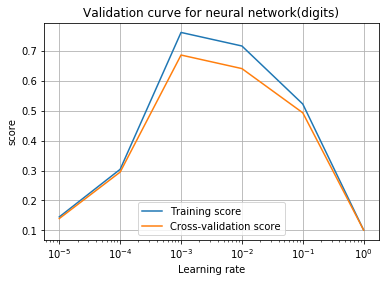

In [83]:
# Learning rate
lr_range = np.logspace(-5, 0, 6)
train_scores, test_scores = validation_curve(clf_nn, X_train, y_train, param_name="learning_rate_init", param_range=lr_range, 
                                             cv=5)

plt.figure()
plt.semilogx(lr_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(lr_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for neural network(digits)')
plt.xlabel('Learning rate')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [84]:
dt_stump = tree.DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
clf_boosted = AdaBoostClassifier(base_estimator=dt_stump, random_state=7)
clf_boosted.fit(X_train, y_train)
y_pred = clf_boosted.predict(X_test)
boosted_accuracy = accuracy_score(y_test, y_pred)
print('Adaboost without hyperparameter tuning is %.2f%%' % (boosted_accuracy * 100))

Adaboost without hyperparameter tuning is 27.59%


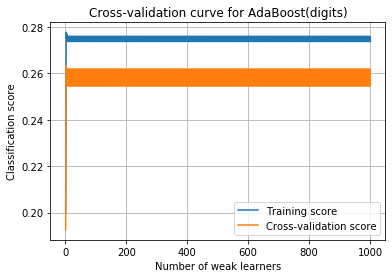

In [85]:
from sklearn.model_selection import KFold
# Define AdaBoost learner
num_learners = 1000
dt_stump = tree.DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
clf_boosted = AdaBoostClassifier(base_estimator=dt_stump, n_estimators=num_learners, random_state=7)

# Cross-validation
num_folds = 5
kf = KFold(n_splits=num_folds, random_state=7)
train_scores = np.zeros((num_learners, num_folds))
val_scores = np.zeros((num_learners, num_folds))
for idx, (train_index, test_index) in enumerate(kf.split(X_train)):
    clf_boosted.fit(X_train[train_index], y_train[train_index])
    train_scores[:, idx] = np.asarray(list(clf_boosted.staged_score(X_train[train_index], y_train[train_index])))
    val_scores[:, idx] = np.asarray(list(clf_boosted.staged_score(X_train[test_index], y_train[test_index])))

n_estimators_range = np.arange(num_learners) + 1
plt.figure()
plt.plot(n_estimators_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(n_estimators_range, np.mean(val_scores, axis=1), label='Cross-validation score')
plt.title('Cross-validation curve for AdaBoost(digits)')
plt.xlabel('Number of weak learners')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [86]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

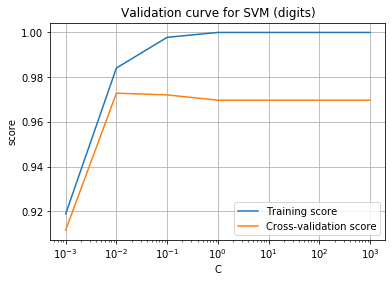

In [87]:
C_range = np.logspace(-3, 3, 7)
train_scores, test_scores = validation_curve(svm_linear, X_train, y_train, param_name="C", param_range=C_range, cv=5)

plt.figure()
plt.semilogx(C_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(C_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for SVM (digits)')
plt.xlabel('C')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

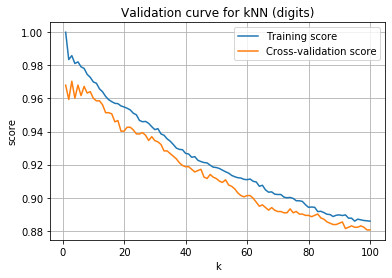

In [88]:
k_range = np.arange(1, 101)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, param_name="n_neighbors", 
                                             param_range=k_range, cv=5)

plt.figure()
plt.plot(k_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(k_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for kNN (digits)')
plt.xlabel('k')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [89]:
from sklearn.metrics import accuracy_score
baseline = [MLPClassifier(random_state=0),DecisionTreeClassifier(random_state=0),KNeighborsClassifier(5),
            SVC(C = 1,random_state=0),GradientBoostingClassifier(random_state=0)]

names = [clf.__class__.__name__ for clf in baseline]
learning_curve_samples = []

for i in [1,2,5]:
    learning_curve_samples.append(int(i * X_train.shape[0] / 100.))
    
for i in range(1,11):
    learning_curve_samples.append(int(i * 10 * X_train.shape[0] / 100.))

In [90]:
from sklearn.neural_network import MLPClassifier

def hyperNN(X_train, y_train, X_test, y_test, title):

    f2_test = []
    f2_train = []
    hlist = np.linspace(1,150,30).astype('int')
    for i in hlist:         
            clf = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation='logistic', 
                                learning_rate_init=0.05, random_state=100)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f2_test.append(f2_score(y_test, y_pred_test))
            f2_train.append(f2_score(y_train, y_pred_train))
      
    plt.plot(hlist, f2_test, 'o-', color='r', label='Test Score')
    plt.plot(hlist, f2_train, 'o-', color = 'b', label='Train Score')
    plt.ylabel('Score')
    plt.xlabel('number of Units')
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [91]:
learningcurve = {}
for clf in baseline:
    clf_name = clf.__class__.__name__
    learningcurve[clf_name] = {'test':[],'train':[]}
    
    for i, sample in enumerate(learning_curve_samples):
        clf.fit(X_train[:sample],y_train[:sample])
        
        ytest_pred = clf.predict(X_test)
        ytrain_pred = clf.predict(X_train[:sample])
        
        error_test = 1. - accuracy_score(y_test,ytest_pred)
        error_train = 1. - accuracy_score(y_train[:sample],ytrain_pred)
                
        learningcurve[clf_name]['test'].append(error_test)
        learningcurve[clf_name]['train'].append(error_train)

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


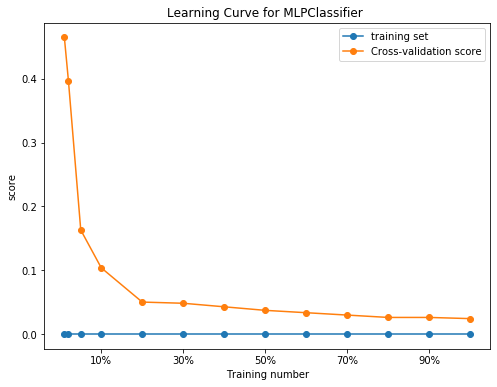

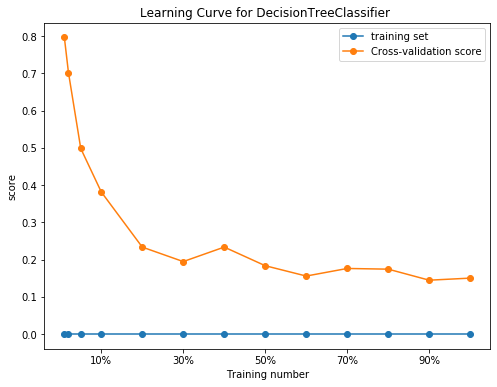

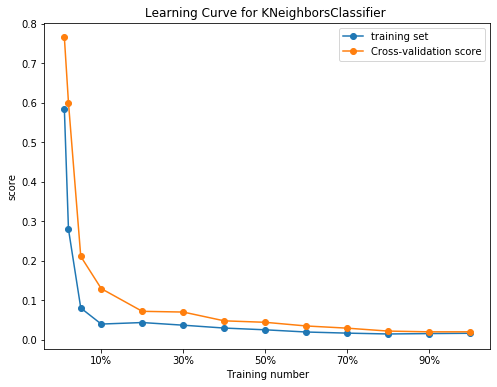

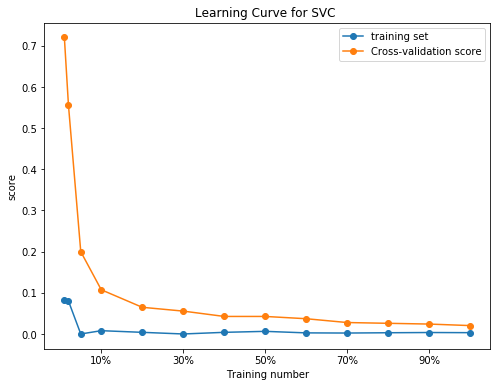

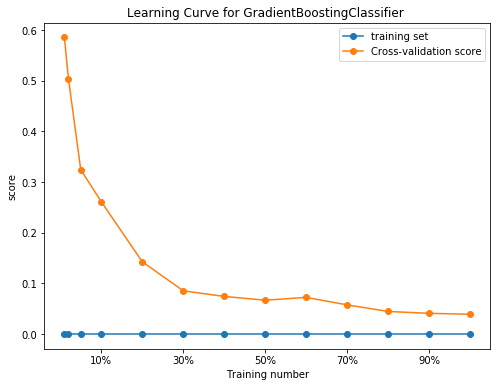

In [92]:
for i in range(5):
    x = [1,2,5,10,20,30,40,50,60,70,80,90,100]
    plt.figure(figsize = (8,6))
    plt.title('Learning Curve for {} '.format(names[i]),fontsize = 12)
    plt.plot(x,learningcurve[names[i]]['train'],'o-',label='training set')
    plt.plot(x,learningcurve[names[i]]['test'],'o-', label='Cross-validation score') 
    ticks = [10,30,50,70,90]
    plt.xticks(ticks,[str(x)+"%" for x in ticks])
    plt.xlabel("Training number")
    plt.ylabel("score")
    plt.legend(loc="best");   
    

In [122]:
def hyperBoost(X_train, y_train, X_test, y_test, max_depth, min_samples_leaf, title):
    
    f1_test = []
    f1_train = []
    n_estimators = np.linspace(1,250,40).astype('int')
    for i in n_estimators:         
            clf = GradientBoostingClassifier(n_estimators=i, max_depth=int(max_depth/2), 
                                             min_samples_leaf=int(min_samples_leaf/2), random_state=100,)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test, average='micro'))
            f1_train.append(f1_score(y_train, y_pred_train, average='micro'))
      
    plt.plot(n_estimators, f1_test, 'o-', color='r', label='Test Score')
    plt.plot(n_estimators, f1_train, 'o-', color = 'b', label='Train Score')
    plt.ylabel('Score')
    plt.xlabel('No. Estimators')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

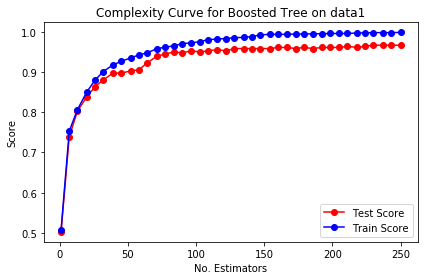

In [123]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.20)
hyperBoost(X_train, y_train, X_test, y_test, 3, 50, title="Complexity Curve for Boosted Tree on data1")

In [101]:
y_test

array([0, 0, 5, 8, 6, 6, 3, 3, 2, 2, 0, 6, 2, 2, 2, 4, 8, 5, 9, 7, 5, 5,
       7, 2, 8, 3, 3, 8, 9, 6, 4, 5, 8, 0, 9, 7, 9, 8, 8, 3, 0, 0, 2, 9,
       6, 5, 8, 4, 3, 4, 7, 8, 6, 5, 0, 1, 5, 3, 9, 6, 4, 9, 1, 4, 0, 1,
       0, 7, 5, 9, 4, 2, 2, 5, 7, 8, 7, 9, 7, 4, 5, 9, 8, 6, 6, 3, 9, 9,
       2, 7, 9, 7, 1, 0, 6, 9, 9, 2, 6, 0, 9, 1, 1, 2, 7, 5, 4, 1, 7, 1,
       1, 5, 0, 0, 1, 8, 1, 7, 6, 3, 3, 8, 5, 6, 3, 3, 2, 9, 6, 3, 6, 0,
       6, 7, 9, 2, 9, 4, 8, 7, 1, 7, 0, 6, 1, 9, 7, 6, 2, 4, 4, 6, 9, 6,
       6, 2, 1, 2, 3, 7, 3, 2, 8, 8, 9, 9, 1, 3, 2, 9, 0, 1, 2, 4, 9, 4,
       5, 9, 8, 4, 4, 5, 0, 9, 0, 3, 7, 2, 2, 9, 3, 0, 6, 0, 8, 0, 4, 6,
       3, 8, 9, 7, 0, 8, 5, 8, 8, 2, 1, 5, 4, 5, 0, 9, 6, 5, 2, 4, 2, 8,
       1, 2, 9, 7, 1, 4, 2, 7, 2, 2, 5, 7, 8, 0, 1, 1, 6, 3, 9, 1, 3, 1,
       2, 5, 2, 4, 2, 3, 0, 6, 5, 9, 0, 5, 4, 1, 5, 2, 4, 4, 5, 0, 0, 4,
       0, 6, 8, 2, 2, 6, 0, 8, 9, 4, 2, 2, 2, 2, 6, 7, 8, 6, 5, 9, 1, 2,
       5, 4, 6, 2, 7, 4, 4, 5, 2, 8, 8, 5, 5, 1, 0,

In [116]:
def hyperTree(X_train, y_train, X_test, y_test, title):
    
    f1_test = []
    f1_train = []
    max_depth = list(range(1,31))
    for i in max_depth:         
            clf = DecisionTreeClassifier(max_depth=i, random_state=100, min_samples_leaf=1, criterion='entropy')
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test,average='micro'))
            f1_train.append(f1_score(y_train, y_pred_train,average='micro'))
      
    plt.plot(max_depth, f1_test, 'o-', color='r', label='Test Score')
    plt.plot(max_depth, f1_train, 'o-', color = 'b', label='Train Score')
    plt.ylabel('Score')
    plt.xlabel('Max Tree Depth')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
     

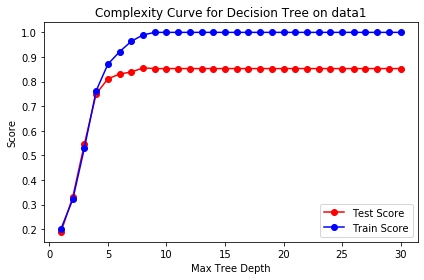

In [117]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.20)
hyperTree(X_train, y_train, X_test, y_test,title="Complexity Curve for Decision Tree on data1")

In [118]:
from sklearn.neural_network import MLPClassifier

def hyperNN(X_train, y_train, X_test, y_test, title):

    f1_test = []
    f1_train = []
    hlist = np.linspace(1,150,30).astype('int')
    for i in hlist:         
            clf = MLPClassifier(hidden_layer_sizes=(i,), solver='adam', activation='logistic', 
                                learning_rate_init=0.05, random_state=100)
            clf.fit(X_train, y_train)
            y_pred_test = clf.predict(X_test)
            y_pred_train = clf.predict(X_train)
            f1_test.append(f1_score(y_test, y_pred_test,average='micro'))
            f1_train.append(f1_score(y_train, y_pred_train,average='micro'))
      
    plt.plot(hlist, f1_test, 'o-', color='r', label='Test Score')
    plt.plot(hlist, f1_train, 'o-', color = 'b', label='Train Score')
    plt.ylabel('Score')
    plt.xlabel('Units')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    

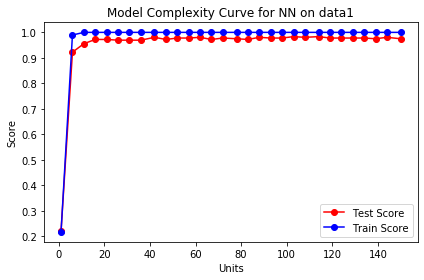

In [119]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.20)
hyperNN(X_train, y_train, X_test, y_test,title="Model Complexity Curve for NN on data1")

In [126]:
from sklearn.svm import SVC

def SVM(X_train, y_train, X_test, y_test, title):

    f1_test = []
    f1_train = []
    kernel_func = ['linear','poly','rbf','sigmoid']
    for i in kernel_func:         
            if i == 'poly':
                for j in [2,5,8]:
                    clf = SVC(kernel=i, degree=j,random_state=100)
                    clf.fit(X_train, y_train)
                    y_pred_test = clf.predict(X_test)
                    y_pred_train = clf.predict(X_train)
                    f1_test.append(f1_score(y_test, y_pred_test,average='micro'))
                    f1_train.append(f1_score(y_train, y_pred_train,average='micro'))
            else:    
                clf = SVC(kernel=i, random_state=100)
                clf.fit(X_train, y_train)
                y_pred_test = clf.predict(X_test)
                y_pred_train = clf.predict(X_train)
                f1_test.append(f1_score(y_test, y_pred_test,average='micro'))
                f1_train.append(f1_score(y_train, y_pred_train,average='micro'))
                
    xvals = ['linear','poly2','poly5','poly8','rbf','sigmoid']
    plt.plot(xvals, f1_test, 'o-', color='r', label='Test Score')
    plt.plot(xvals, f1_train, 'o-', color = 'b', label='Train Score')
    plt.ylabel('Score')
    plt.xlabel('Kernel')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The defa

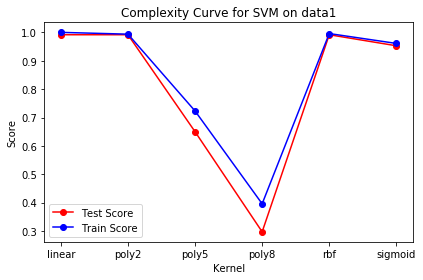

In [127]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.20)
SVM(X_train, y_train, X_test, y_test,title="Complexity Curve for SVM on data1")

In [128]:
from sklearn.neighbors import KNeighborsClassifier as kNN
def hyperKNN(X_train, y_train, X_test, y_test, title):
    
    f1_test = []
    f1_train = []
    klist = np.linspace(1,250,25).astype('int')
    for i in klist:
        clf = kNN(n_neighbors=i,n_jobs=-1)
        clf.fit(X_train,y_train)
        y_pred_test = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        f1_test.append(f1_score(y_test, y_pred_test,average='micro'))
        f1_train.append(f1_score(y_train, y_pred_train,average='micro'))
        
    plt.plot(klist, f1_test, 'o-', color='r', label='Test Score')
    plt.plot(klist, f1_train, 'o-', color = 'b', label='Train Score')
    plt.ylabel('Score')
    plt.xlabel('Neighbors')
    
    plt.title(title)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

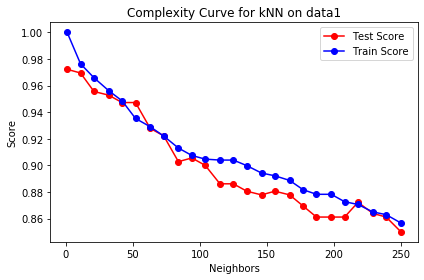

In [129]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X),np.array(y), test_size=0.20)
hyperKNN(X_train, y_train, X_test, y_test,title="Complexity Curve for kNN on data1")

In [111]:
improved1 = [
    MLPClassifier(random_state=0,max_iter = 10),
             DecisionTreeClassifier(random_state=0, max_depth = 11),
             KNeighborsClassifier(100),
             SVC(C = 1., kernel = 'linear', probability=True,random_state=0),
             GradientBoostingClassifier(random_state=0,max_depth = 6)]

In [112]:
from sklearn.metrics import auc,roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
rocauc = {}


# Binarize the output
y1 = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
n_classes = y1.shape[1]
X1_train, X1_test, y1_train, y1_test = train_test_split(np.array(X),np.array(y1), test_size=0.20)

for clf in improved1:
    clf_name = clf.__class__.__name__
    rocauc[clf_name] = {'auc':0,'fpr':[],'tpr':[]}
    
    classifier = OneVsRestClassifier(clf)
    y1_score = classifier.fit(X1_train,y1_train).predict_proba(X1_test)
    
#     rocauc[clf_name]['fpr'],rocauc[clf_name]['tpr'],_ = roc_curve(y1_test, clf.predict_proba(X1_test)[:, 1])
#     rocauc[clf_name]['auc'] = auc(rocauc[clf_name]['fpr'], rocauc[clf_name]['tpr'])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y1_test[:, i], y1_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    rocauc[clf_name]['fpr'],rocauc[clf_name]['tpr'],_ = roc_curve(y1_test.ravel(), y1_score.ravel())
    rocauc[clf_name]['auc'] = auc(rocauc[clf_name]['fpr'], rocauc[clf_name]['tpr'])

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//an

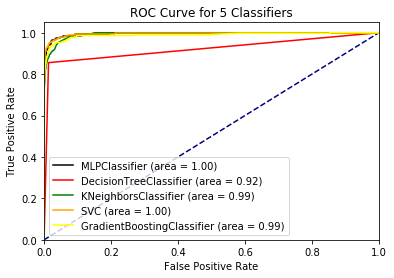

In [113]:
colors = ['black','red','green','orange','yellow']
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')

for i,name in enumerate(rocauc.keys()):
    plt.plot(rocauc[name]['fpr'], rocauc[name]['tpr'], color=colors[i],label='{} (area = {:.2f})'.format(name,rocauc[name]['auc']))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC Curve for 5 Classifiers');
plt.legend(loc="best"); 